# Module 4 Exercises - Data Visualization

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### Exercise 1:

From the datasets folder, load the "dvddata.xlsx" file as a dataframe. Then rename the following columns (new column name is in parentheses):
- \# of Clients (Clients)
- Visits to each Client per Month (Visits)
- Calls to each Client per month (Calls)
- Emails to each Client per month (Emails)
- \# of businesses in district (Business)

In [2]:
df = pd.read_excel("datasets/dvddata.xlsx", encoding = "ISO-8859-1") #1st column needs encoding to read pound/hashtag(#) symbol
df.head()

Salesperson  District Region  Sales  # of Clients  \
0     Addie Miller        52      A    393            16   
1     Addie Miller        67      A    267            11   
2     Addie Miller       104      A    148             4   
3  Alexandra Jones        49      A    317            17   
4   Alonzo Tennant        46      A    276            16   

    Visits to each Client per Month  Calls to each Client per month  \
0                                 2                               4   
1                                 2                               1   
2                                 1                               1   
3                                 0                               7   
4                                 2                               2   

   Emails to each Client per month  # of businesses in district  
0                               30                          500  
1                               14                          627  
2                               17                          778  
3                                1                          530  
4                               22                          770

### Exercise 2:

Using the dataframe from the previous exercise, use the Seaborn library to create a scatterplot of the number of clients compared to the sales.

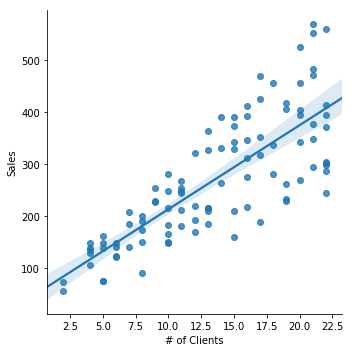

In [4]:
sns.lmplot(x='# of Clients', y='Sales', data=df)

### Exercise 3:

Using the dataframe in the previous exercise, use the Seaborn library to make a boxplot of the Clients, Visits, Calls, and Emails columns. (**Hint**: Make a dataframe that only contains those columns)

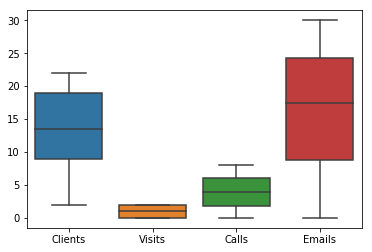

In [3]:
comms_df = df.drop(['Salesperson', 'District', 'Region', 'Sales', '# of businesses in district'], axis=1)
comms_df.rename(columns={'# of Clients' : 'Clients'}, inplace = True)
comms_df.rename(columns={' Visits to each Client per Month' : 'Visits'}, inplace = True)
comms_df.rename(columns={'Calls to each Client per month' : 'Calls'}, inplace = True)
comms_df.rename(columns={'Emails to each Client per month' : 'Emails'}, inplace = True)
sns.boxplot(data=comms_df)

### Exercise 4:

Using the dataframe from Exercise 3, use the Seaborn library to make a violin plot of sales per region.

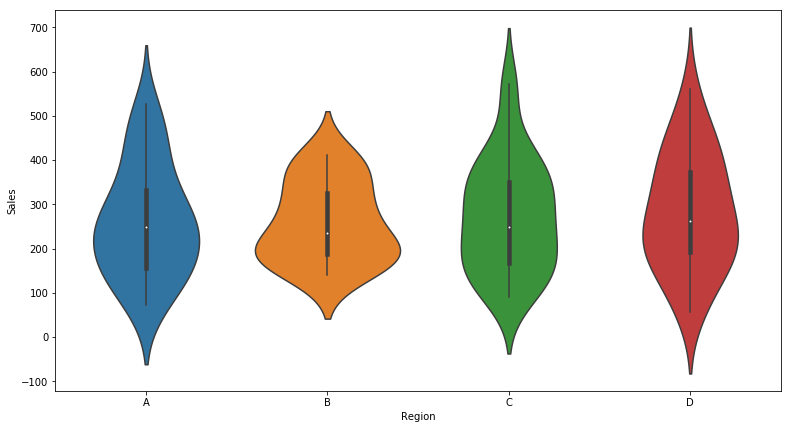

In [26]:
plt.subplots(figsize=(13,7))
sns.violinplot(x='Region', y='Sales', data=df)

### Exercise 5:

Using the dataframe in the previous exercise, create a swarm plot of sales per region.

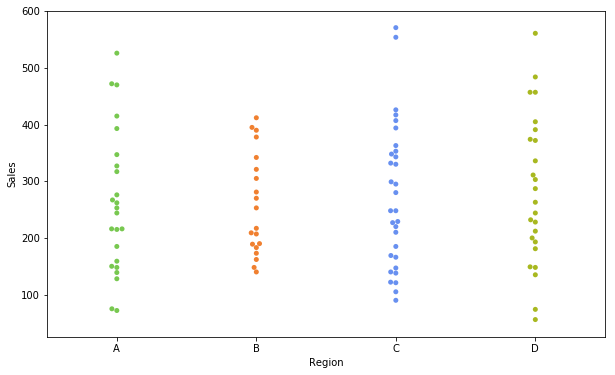

In [27]:
#create color palette
#color Hex numbers are from Bulbapedia (https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

plt.subplots(figsize=(10,6))
sns.swarmplot(x='Region', y='Sales', data=df, palette=pkmn_type_colors)

### Exercise 6:

Using the dataframe in the previous exercise, make a correlation heatmap.

Text(0.5,1,'Sales per Region')

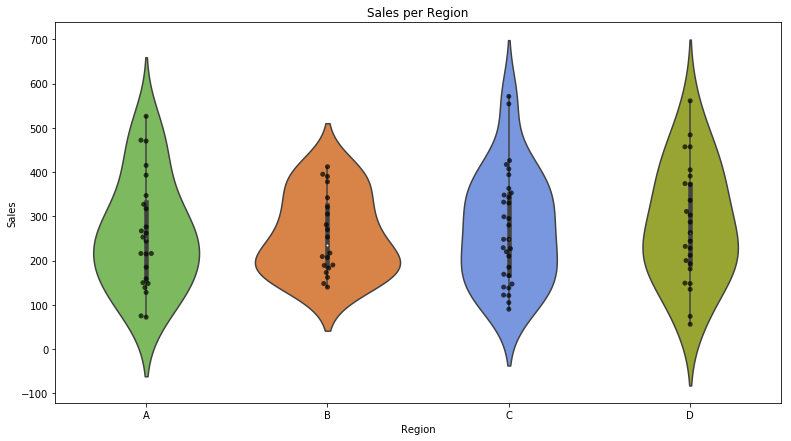

In [30]:
plt.figure(figsize=(13,7))
sns.violinplot(x='Region', y='Sales', data=df, palette=pkmn_type_colors)
sns.swarmplot(x='Region', y='Sales', data=df, color='k', alpha=0.7)
plt.title("Sales per Region")

### Exercise 7:

Using the dataframe in the previous exercise, make a bar chart (count plot) of the regions.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

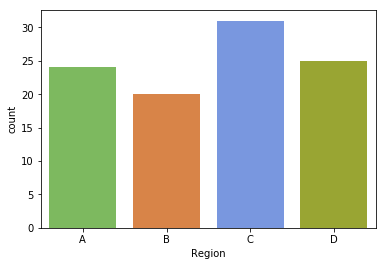

In [33]:
sns.countplot(x='Region', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=0)

### Bonus  

Feel free to explore any other data visualizations using the Seaborn library.

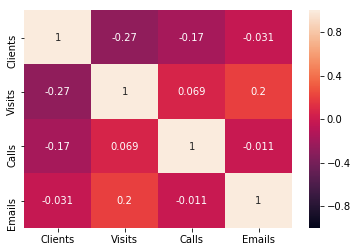

In [34]:
#show correlation of stats via heatmap
corr = comms_df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

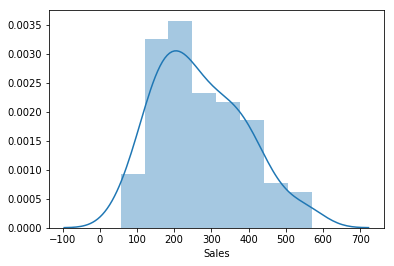

In [35]:
#create a histogram of the distribution of attack power
sns.distplot(df['Sales'])

In [52]:
#create a column that contains all stat types and a column for their corresponding value
melt_df = pd.melt(comms_df, 
                  id_vars=['Calls', 'Visits', 'Emails'], #column to keep
                  var_name="Client")

melt_df.head()
#comms_df.columns

Calls  Visits  Emails   Client  value
0      4       2      30  Clients     16
1      1       2      14  Clients     11
2      1       1      17  Clients      4
3      7       0       1  Clients     17
4      2       2      22  Clients     16

In [46]:
#melted datframe has 6 times the amount of rows as original stats dataframe
#6 rows for each pokemon for each stat type
print(comms_df.shape)
print(melt_df.shape)

(100, 4)
(100, 5)


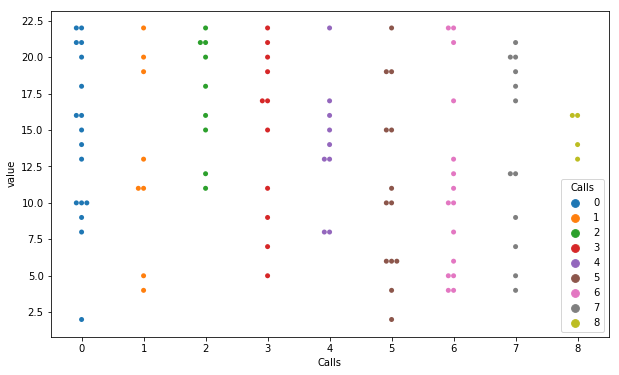

In [59]:
plt.figure(figsize=(10,6))

#swarm plot of Stats from melted dataframe
sns.swarmplot(x='Calls', y='value', 
              data=melt_df,
              hue='Calls')

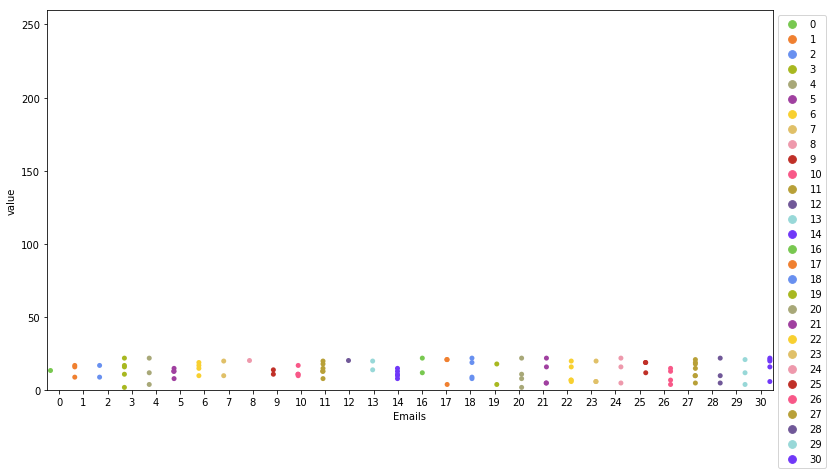

In [58]:
plt.figure(figsize=(13,7))

sns.swarmplot(x='Emails', y='value',
              data=melt_df,
              hue='Emails', 
              dodge=True, #separate points on chart by hue
              palette=pkmn_type_colors)

#adjust the y-axis
plt.ylim(0,260)

#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

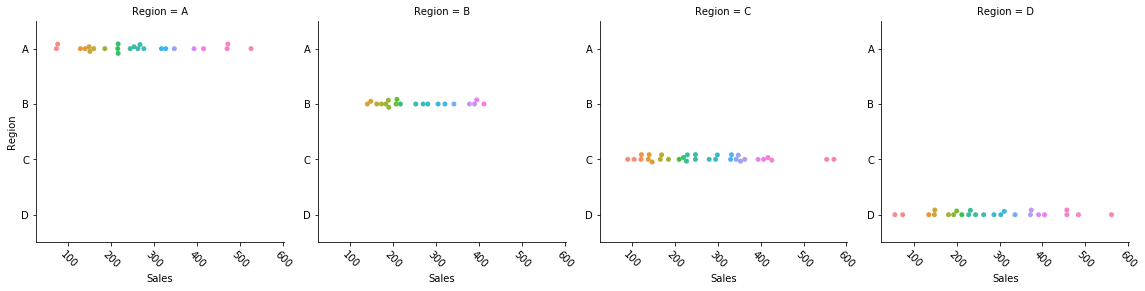

In [61]:
#scatterplot by each stage type (evolution level)
g = sns.factorplot(x='Sales', y='Region',
                   data=df,
                   hue='Sales', 
                   col='Region',
                   kind='swarm')

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)